In [1]:
## PRELIMINARIES ##
%load_ext autoreload
%autoreload 2

from IPython.display import HTML
from IPython.display import Javascript
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [2]:
# Python imports
import sys
sys.path.append('../')
import glob

In [3]:
# Rankutils imports
from rankutils.cfgloader import *
from rankutils.utilities import safe_create_dir, completedir, getbasename
from rankutils.rIO import read_rank

In [4]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import mpld3

from sklearn.metrics import recall_score, precision_recall_curve

In [5]:
def get_label(name):
    
    parts = name.split("_")
    i = 0
    
    for i in range(len(parts)):
        if parts[i].isdigit():
            break
            
    return "_".join(parts[:i])

In [6]:
def get_query_label(qname):
    
    suffix = qname.split("_", 1)[1]
    return get_label(suffix)

In [7]:
def get_relev_list(qname, rknames):
    
    predicted = []
    
    for name in rknames:
        predicted.append(get_label(name) == get_query_label(qname))
        
    predicted = np.array(predicted, dtype=np.uint8)
    true = np.sort(predicted)[::-1]
    
    return true, predicted

In [8]:
inputdir = '/home/alberto/phD/projects/performance_prediction/ret-mr-learning/input-ranks/2x5-fold/places365/desc1-vgg16-DEEPFV'
inputdir = completedir(inputdir)

rkflist = glob.glob(inputdir + "*.rk")
rkflist.sort()

In [9]:
rk = read_rank(rkflist[0])
rkfname = os.path.basename(rkflist[0])

true, pred = get_relev_list(rkfname, rk['name'])

flist = np.arange(0.0, 1.05, 0.05)
m_ratio = np.zeros(flist.size, dtype=np.float32)

ticklabels = []

for i, f in enumerate(flist):
    ed = int(np.floor(f*pred.size))
    head = pred[:ed]
    ticklabels.append(ed)
    
    m_ratio[i] = np.sum(head)/np.sum(pred)

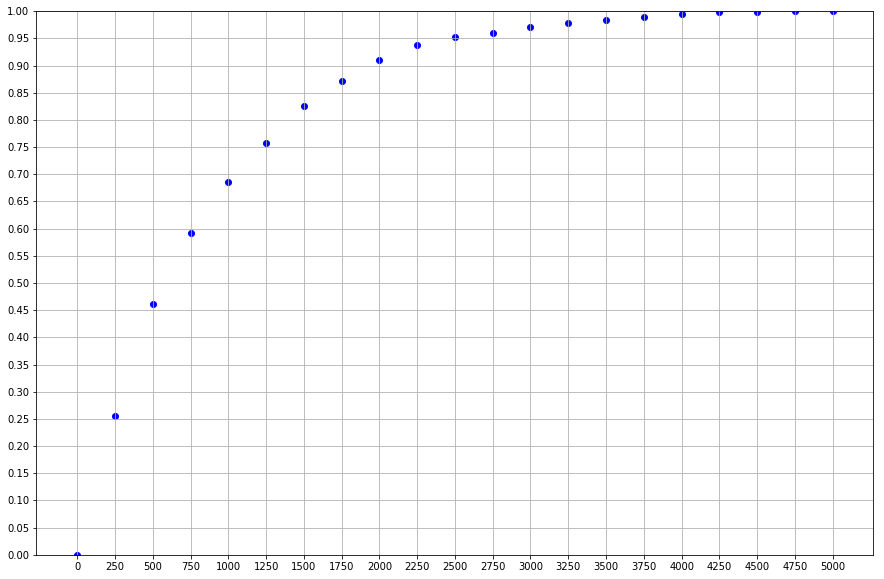

In [10]:
fig, ax = plt.subplots()
# WIDTH, HEIGHT
fig.set_size_inches(15, 10)

ax.scatter(flist, m_ratio, color='blue')
ax.grid()

ax.set_xticks(flist)
ax.set_xticklabels(ticklabels)

ax.set_yticks(np.arange(0.0, 1.05, 0.05))
ax.set_ylim(0.0, 1.0)

mpld3.disable_notebook()